# INTRODUCTION

Nous nous sommes demandés quelles marques recommander aux consommateurs et sur quelle données s'appuyer pour recommander les meilleurs marque 
aux consommateurs.
3 jeux de données on été utilisés pour aiguiller au mieux le choix du consommateur:

- Un jeu de données sur l'agriculture biologique
- Un jeu de données relatif à la qualité nutrionelle des produis
- Un jeu de données traitant de l'impact environnemental des marques

Nous sommes parti du principes qu'une marque devait avoir un minimum 100 produits pour être prise en compte.

# Préparation de L'environnement et nettoyage

### préparation

In [24]:
# Import de la librairie Pandas
import pandas as pd

# Import de la librairie matplotlib
import matplotlib.pyplot as plt

# Import de la librairie scipy
from scipy.stats import chi2_contingency as chi2_contingency

# Import de la librairie scipy
import plotly.express as px

import numpy as np

In [25]:
bio = pd.read_csv("Agriculture_biologique_final.csv", sep ="\t",low_memory = False)
env = pd.read_csv("Impact environnemental_final.csv", sep ="\t", low_memory = False)
quali = pd.read_csv("Qualite nutritionnelle_final.csv", sep ="\t",low_memory = False)

### nettoyage

In [26]:
env.drop(columns = "serving_size", inplace = True)
quali.drop(columns = "serving_size", inplace = True)
bio = bio.drop(columns = "serving_size")

In [27]:
quali = quali[quali.brands_tags.notna()]
quali = quali[quali.product_name.notna()]
env = env[env.brands_tags.notna()]
env = env[env.product_name.notna()]
env['ecoscore_grade'].replace('unknown', np.NaN, inplace = True)
env['ecoscore_grade'].replace('not-applicable', np.NaN, inplace = True)

## Quelles sont les marques qui jouent le jeu et affichent le nutriscore ? Lesquelles ne le font pas?

### Les marques qui affichent le plus nutriscore

Pour déterminer si une marque jouait le jeu il ne suffit pas qu'elle possède beaucoup de produits avec un nutriscore mais il faut qu'elle 
est un ratio,superieur à 60%, du nombre totale des ces produits avec un nutriscore sur le nombre total de ses produits.
les 5 marques avec le meilleur ratio sont:

- u-saveurs,u (88.1%)
- belle-france (83.8%)
- carrefour-bio,carrefour (83.7%)
- la-nouvelle-agriculture (78.2%)
- monique-ranou (76.8%)


### Les marques qui affichent le moins le nutriscore

A l'inverse les marques avec un ratio, inferieur à 20%, du nombre totale des ses produits avec un nutriscore sur le nombre total de ses produits, ne jouent pas réellement le jeux du nutriscore.
les 5 marques avec le pire ratio sont:

- palais-des-thes (5%)
- ducros (9%)
- sainte-lucie (14%)
- myprotein (18%)
- maggi (18.5%)

On peut faire l'hypothèse que ces marques affichent uniquement le nutriscore sur leur produits avec un nutriscore A ou B pour avoir une image de marque saine.

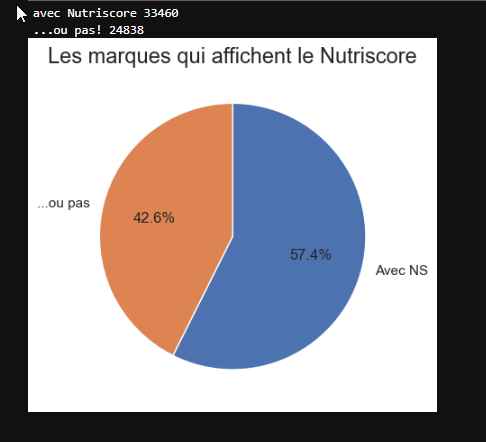

## Quelles sont les marques qui ont le plus recours aux additifs nocifs ? 


Pour repérer les marques avec le plus d'additifs nocifs, on disposait d'une colonne dans le jeux de données sur la qualitée nutrionelle des produits.
Donc pour déterminer on a regarder le ration nombre d'addittifs nocifs par produits sur le nombre de produits. Voici les 5 premières marques en termes d'additifs nocifs:

- eco (0,6%)
- migros (0,5%)
- le-comptoir-de-mathilde(0,3%)
- nestle (0,25%)
- sainte-lucie (0,18%)

On remarque que le nomre de produits des marques possédants des additifs nocifs est toujours inférieur à 1%.
ce résultat est enfaite seulement pour les marques avec au moins 500 produits, si on prends un seuils de 100 produits le résulat est plus alarmant.
Par exemple une marque comme SodaStream 20% de ses produits 

## Quelles sont les marques qui présentent des produits avec la meilleure qualité nutritionnelle ? Les pires ?


La qualité nutrionelle est déterminé par le nutriscore. Le nutriscore va de A à E, un nutriscore A correspond à la meilleur qualité nutrionelle possible.
A l'inverse un nutriscore E correspond a la pire qualité nutritionelle possible. Nous avons calculer le ratio de nutriscore A et B sur le nombre de produits avec un nutriscore et le ratio de nutriscore D et E sur le nombre de produits avec un nutriscore.


Donc les 5 marques avec la meilleur qualité nutrionelle sont:

- bonduelle(94%)
- la-nouvelle-agriculture (92%)
- charal (74%)
- danone (66%)
- bjorg (62%)


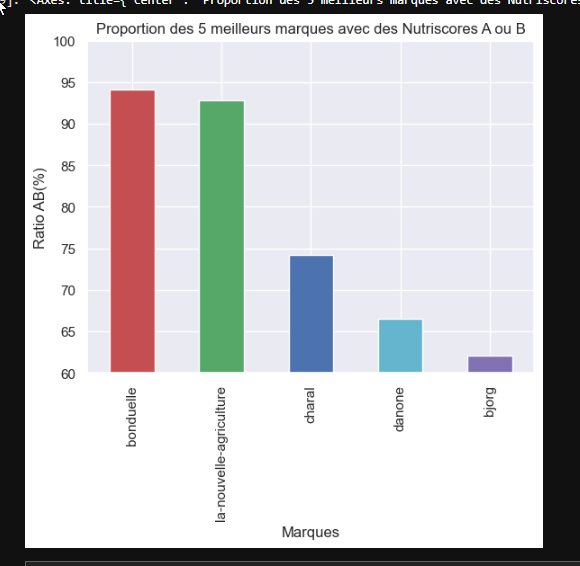

Donc les 5 marques avec la pire qualité nutrionelle sont:

- lindt (100%)
- haribo (96%)
- labeyrie (91%)
- leclerc (68%)
- bonne-maman (64%)



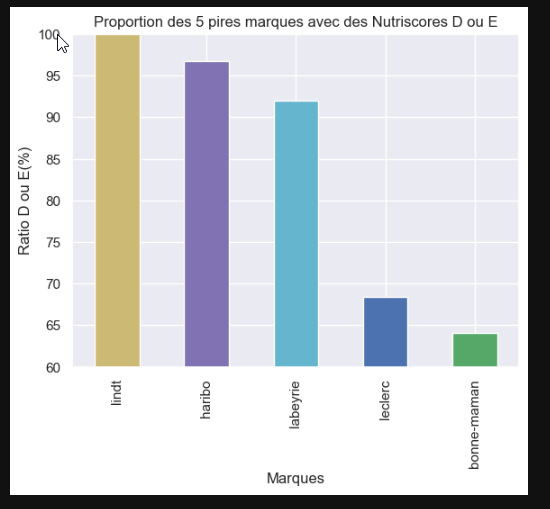

Ici on voit par exemple qu'un produit Lindt avec un nutriscore, a 100%  de chance d'avoir un nutriscore D et/ou E.

## Quelles sont les marques qui jouent le jeu et affichent l'ecosore ? Lesquelles ne le font pas?


### Les marques qui affichent le plus l'écoscore

Pour déterminer si une marque jouait le jeu il ne suffit pas qu'elle possède beaucoup de produits avec un ecoscore mais il faut qu'elle 
est un ratio,superieur à 60%, du nombre totale des ces produits avec un ecoscore sur le nombre total de ses produits.
les 5 marques avec le meilleur ratio sont:

- la-nouvelle-agriculture (84.7%)
- belle-france (80%)
- carrefour-bio,carrefour (79%)
- le-gaulois (77%)
- delpeyrat (75%)

### Les marques qui affichent le moins l'écoscore


A l'inverse les marques avec un ratio, inferieur à 20%, du nombre totale des ses produits avec un nutriscore sur le nombre total de ses produits, ne jouent pas réellement le jeux du nutriscore.
les 5 marques avec le pire ratio sont:

- myprotein (5.6%)
- palais-des-thes (6.7%)
- maggi (7.7%)
- prozis (9.5%)
- knorr (18.2%)

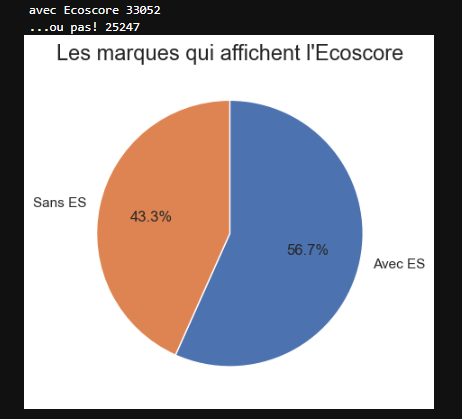

##  Quelles sont les marques qui semblent le plus respectueuses de l'environnement ? le moins?


L'impact environnementale est déterminé par l'ecoscore.L'écoscore va de A a E , un ecoscore A correspond au meilleur impact environnementale possible.
A l'inverse un ecoscore E correspond au impact environnementale possible.  Nous avons calculer le ratio de l'ecoscore A et Bsur le nombre de produits avec un ecoscore et le ratio de l'ecoscore D et E sur le nombre de  produits avec un ecoscore.

Donc les 5 marques avec le meilleur respect de l'environemment sont:

- bio village, marque repères (60%)
- la vie clair (55%)
- picard (45%)
- dia (39%)
- franprix (38%)



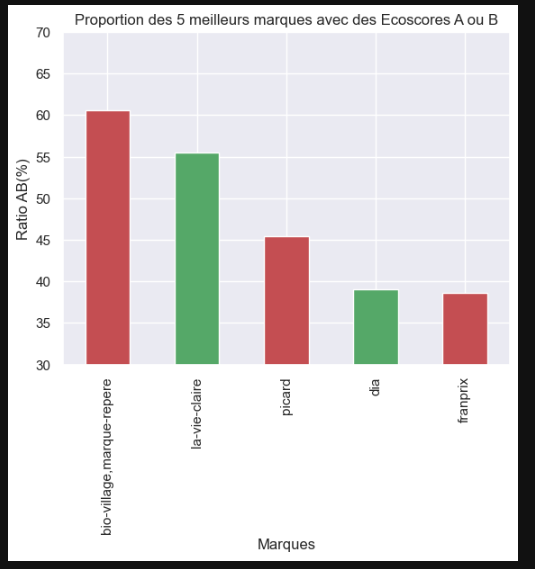

Donc les 5 marques avec le pire impact environnementale sont:
- haribo  (96%)
- labeyrie (91%)
- leclerc(68%)
- bonne-maman (64%)
- nestle (55%)


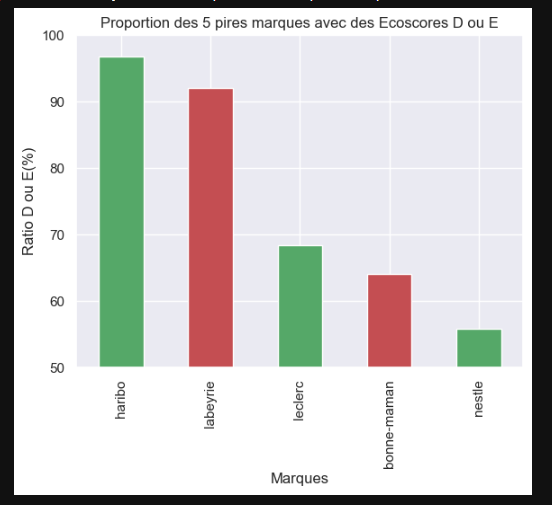

## Quelles sont les marques qui proposent essentiellement des produits biologiques ?


On dispose d'un jeu de données qui nous indique si un produit est bio ou non. Pour savoir si une marque propose essentiellement des produits biologique, nous avons fais le ratio du nombre de produits biologique sur le nombre totale de produit de la marque.
Donc le marques proposant essentiellement des produits bio sont:

- carrefour-bio,carrefour (99%)
- u-bio,u (98.7%)
- bio-village,marque-repere (98.3%)
- biocoop (92%)
- bonneterre (89%)

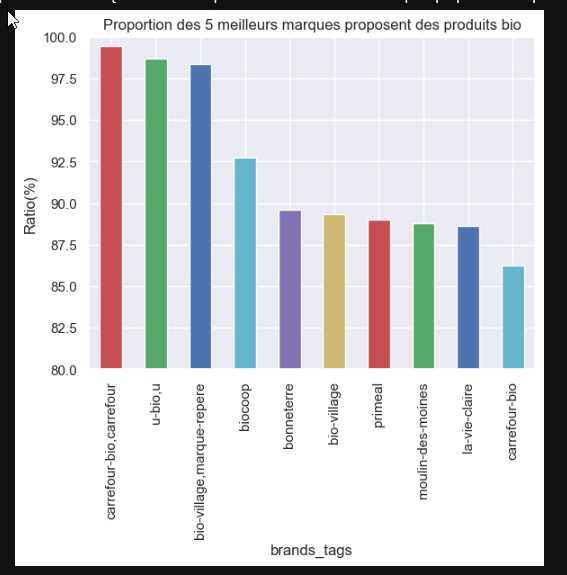

## Observe-t-on une corrélation entre le caratère bio des produits et la qualité nutritionnelle ? 


On a un khi² égale à 172.2 ce qui nous montre qu'il y a bien une corrélation entre le caractère bio des produits et la qualité nutrionelle.

Pour vérifier que cette corrélation n'est pas du au hasard on regarde la p-value. Si notre p-value est inférieur à 5%, on sait que la corrélation observer n'est pas du au hasard.
Ici la p-value est égale à 9*10^(-30)% donc on peut affimer que la corrélation observer entre le caractère bio des produits et la qualité nutrionelle.

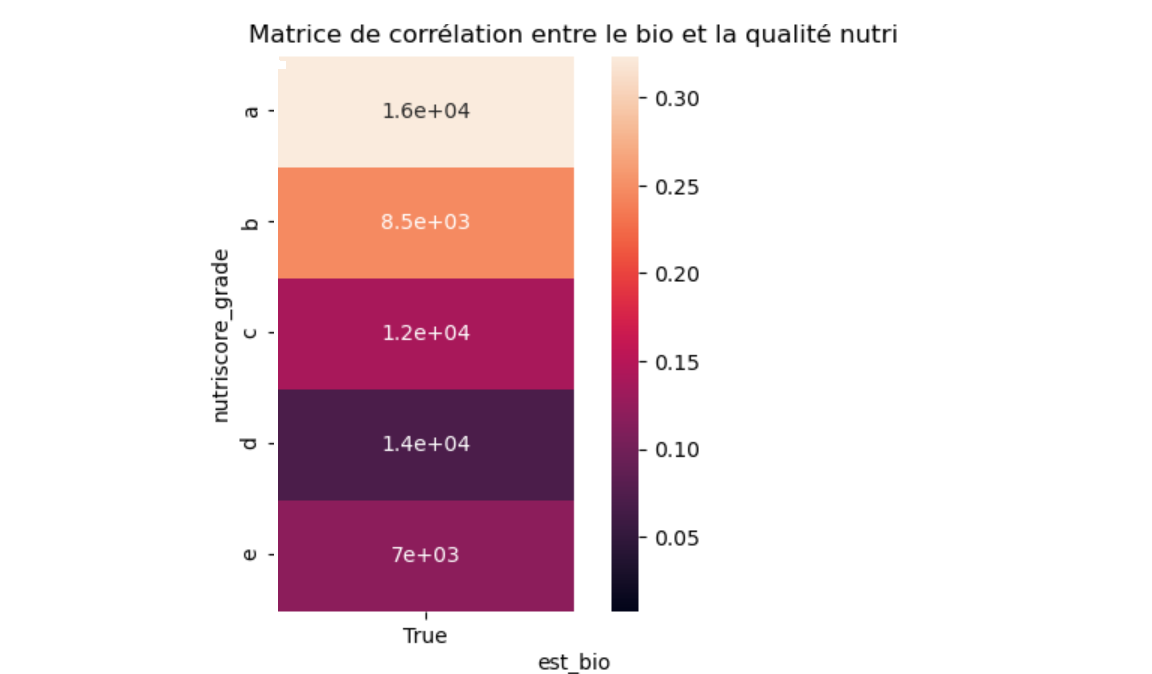

On observe ici quand un produits un a un nutriscore A il beaucoup de chance d'être bio, et inversement quand un produit est bio il a plus de chance d'avoir un nutriscore A.

## Observe-t-on une corrélation entre le caratère bio des produits et l'aspect envionnemental ?

On a un khi² égale à 38815
 ce qui nous montre qu'il y a bien une corrélation entre le caractère bio des produits et l'aspect environnementale.
 
Pour vérifier que cette corrélation n'est pas du au hasard on regarde la p-value. Si notre p-value est inférieur à 5%, on sait que la corrélation observer n'est pas du au hasard.
Ici la p-value est égale à 0% donc on peut affimer que la corrélation observer entre le caractère bio des produits et l'aspect environnementale.

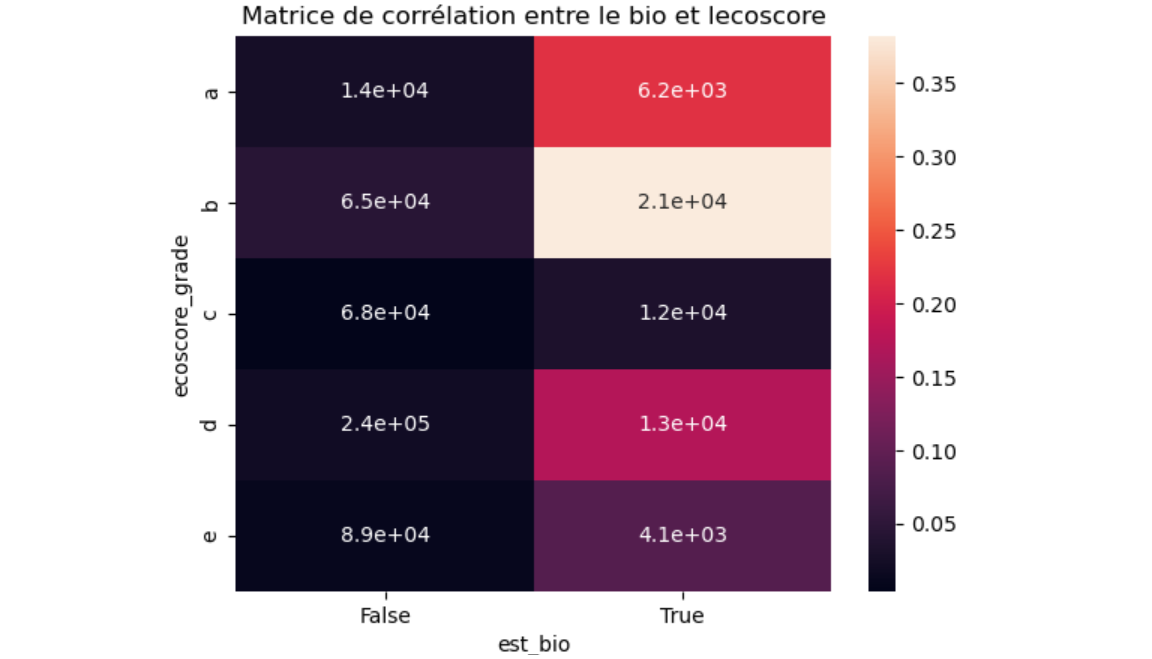

Ici on observe qu'un produit non bio à des chances d'avoir un nutriscore E et inversement.

## Observe-t-on une corrélation entre la la qualité nutritionnelle et l'aspec envionnemental ?

On a un khi² égale à 27393 ce qui nous montre qu'il y a bien une corrélation entre le caractère bio des produits et la qualité nutrionelle.
Pour vérifier que cette corrélation n'est pas du au hasard on regarde la p-value. Si notre p-value est inférieur à 5%, on sait que la corrélation observer n'est pas du au hasard.
Ici la p-value est égale à 0% donc on peut affimer que la corrélation observer entre le caractère bio des produits et la qualité nutrionelle.

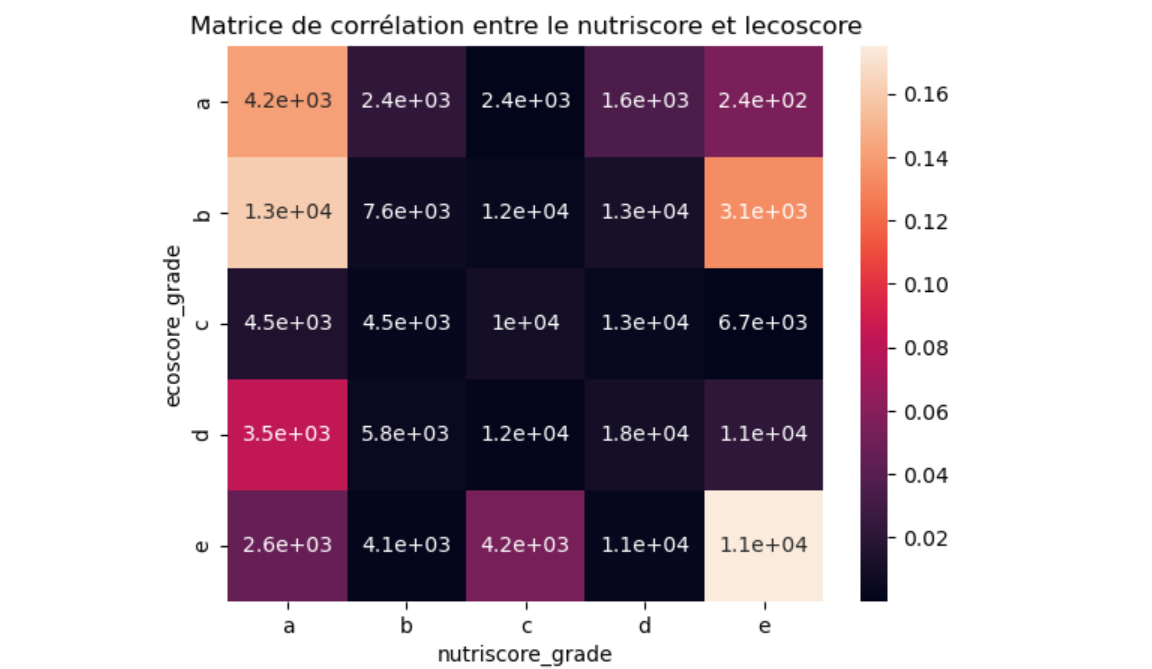

Ici on observe qu'un nutriscore A à des chances d'avoir un nutriscore A et idem pour B C D E.

## Quelles marques faut-il recommander ? 

## Quelles marques ne faut-il surtout pas recommander ? 

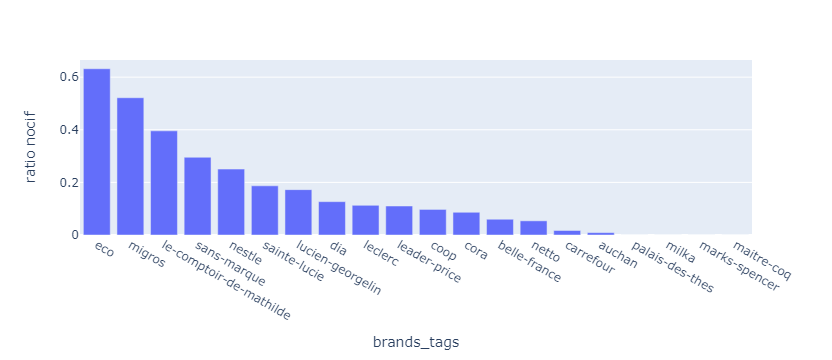

In [54]:
quali["nb_nocif_1"] = quali["nb_nocif"].loc[quali["nb_nocif"] == 1]
quali["nb_nocif_2"] = quali["nb_nocif"].loc[quali["nb_nocif"] == 2]
quali["nb_nocif_0"] = quali["nb_nocif"].loc[quali["nb_nocif"] == 0]


nocif = quali[["brands_tags","nb_nocif_1","product_name","nb_nocif_2"]]
nocif = nocif.groupby("brands_tags", as_index = False).count()


#on supprime tte les marque avec moins de 500 produits
ind2 = nocif[nocif["product_name"] <500].index
nocif.drop(ind2, inplace = True)

nocif["total"] = nocif["nb_nocif_2"] + nocif["nb_nocif_1"]
nocif["ratio nocif"] = nocif["total"]/nocif["product_name"]*100

nocif.sort_values("ratio nocif", ascending = False).head(5)

fig = px.bar(nocif.sort_values("ratio nocif", ascending = False).head(20),x="brands_tags", y="ratio nocif")
fig.show()

Nous pouvons voir ici les 16 marques avec des produits possédants des additifs nocifs. Ce sont des marques que nous recommandons donc aboslument pas au consommateur.